In [4]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor, StackingRegressor

from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.datasets import make_regression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
# X, y = make_regression(n_features=4 n_informative=2,random_state=0, shuffle=False)

In [5]:
# load data

def load_data(data_dir,city_name,selected_idx,label_idx):
    
    selected_idx = np.array(list(set(range(19)) - set(list(range(3))+[12])))

    train_data = np.load('{0}/{1}/train.npy'.format(data_dir,city_name))
    test_data = np.load('{0}/{1}/test.npy'.format(data_dir,city_name))

    X_train_raw = train_data[:,selected_idx]
    X_test_raw = test_data[:,selected_idx]

    y_train = train_data[:,label_idx]
    y_test = test_data[:,label_idx]


    # Standardizing data

    scaler = StandardScaler()
    scaler.fit(X_train_raw)
    X_train = scaler.transform(X_train_raw)
    X_test = scaler.transform(X_test_raw)
    
    return X_train,X_test,y_train,y_test



def simulate_regressor(data_dir,src_city_name,tgt_city_name,method):
    
    
    
    X_train_src,X_test_src,y_train_src,y_test_src = load_data(data_dir,src_city_name)
    
    
    if method=='Adaboost':
        regr = AdaBoostRegressor(n_estimators=1000,learning_rate = 1e-3, loss = 'square')
        
    elif method=='GradientBoostingRegressor':
        regr = GradientBoostingRegressor(n_estimators=1000,  learning_rate=1e-3,loss='squared_error')
        
    elif method=='RandomForestRegressor':
        regr = RandomForestRegressor(n_estimators=1000 ,criterion='squared_error')
        
    elif method=='StackingRegressor':    
        estimators = [('lr', RidgeCV()),('svr', LinearSVR())]
        regr = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=1000,random_state=42))
        
    print('Method: ',method)        
        
    regr.fit(X_train_src,y_train_src)
    pred = regr.predict(X_test_src)
    mse = np.mean((pred - y_test_src)**2)
#     mse = mean_squared_error(y_test, regr.predict(X_test_src))

    MAE = np.abs((pred-y_test_src)/(y_test_src+1e-20))
    mask = MAE<5
    MAE = np.mean(np.multiply(MAE,mask))*100
    
#     print('MSE src {0}: '.format(src_city_name),mse) 
    print('MAE src {0}%: '.format(src_city_name),MAE) 
    
    for j in range(len(tgt_city_name)):
        X_train_tgt,X_test_tgt,y_train_tgt,y_test_tgt = load_data(data_dir,tgt_city_name[j])
        pred = regr.predict(X_test_tgt)
        mse = np.mean((pred - y_test_tgt)**2)
        
        MAE = np.abs((pred-y_test_src)/(y_test_tgt+1e-20))
        mask = MAE<5
        MAE = np.mean(np.multiply(MAE,mask))*100
#         mse = mean_squared_error(y_test, regr.predict(X_test_tgt))
#         print('MSE tgt {0}: '.format(tgt_city_name[j]),mse) 
        print('MAE tgt {0} %: '.format(tgt_city_name[j]),MAE) 

In [ ]:
def simulate_classifier(data_dir,src_city_name,tgt_city_name,method):
    
    
    
    X_train_src,X_test_src,y_train_src,y_test_src = load_data(data_dir,src_city_name)
    
    
    if method=='Adaboost':
        regr = AdaBoostRegressor(n_estimators=1000,learning_rate = 1e-3, loss = 'square')
        
    elif method=='GradientBoostingRegressor':
        regr = GradientBoostingRegressor(n_estimators=1000,  learning_rate=1e-3,loss='squared_error')
        
    elif method=='RandomForestRegressor':
        regr = RandomForestRegressor(n_estimators=1000 ,criterion='squared_error')
        
    elif method=='StackingRegressor':    
        estimators = [('lr', RidgeCV()),('svr', LinearSVR())]
        regr = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=1000,random_state=42))
        
    print('Method: ',method)        
        
    regr.fit(X_train_src,y_train_src)
    pred = regr.predict(X_test_src)
    mse = np.mean((pred - y_test_src)**2)
#     mse = mean_squared_error(y_test, regr.predict(X_test_src))

    MAE = np.abs((pred-y_test_src)/(y_test_src+1e-20))
    mask = MAE<5
    MAE = np.mean(np.multiply(MAE,mask))*100
    
#     print('MSE src {0}: '.format(src_city_name),mse) 
    print('MAE src {0}%: '.format(src_city_name),MAE) 
    
    for j in range(len(tgt_city_name)):
        X_train_tgt,X_test_tgt,y_train_tgt,y_test_tgt = load_data(data_dir,tgt_city_name[j])
        pred = regr.predict(X_test_tgt)
        mse = np.mean((pred - y_test_tgt)**2)
        
        MAE = np.abs((pred-y_test_src)/(y_test_tgt+1e-20))
        mask = MAE<5
        MAE = np.mean(np.multiply(MAE,mask))*100
#         mse = mean_squared_error(y_test, regr.predict(X_test_tgt))
#         print('MSE tgt {0}: '.format(tgt_city_name[j]),mse) 
        print('MAE tgt {0} %: '.format(tgt_city_name[j]),MAE) 

In [6]:
data_dir = 'data'

city = ['Dhaka','Paris','Los_Angeles','Tokyo']


for i in range(1):
    
        src_city_name = city[i]

        simulate(data_dir,src_city_name,city,method='Adaboost')
        simulate(data_dir,src_city_name,city,method='GradientBoostingRegressor')
        simulate(data_dir,src_city_name,city,method='RandomForestRegressor')
        simulate(data_dir,src_city_name,city,method='StackingRegressor')



Method:  Adaboost
MAE src Dhaka%:  53.746928022908435
MAE tgt Dhaka %:  53.746928022908435
MAE tgt Paris %:  58.794038586942534
MAE tgt Los_Angeles %:  13.262730011963738
MAE tgt Tokyo %:  64.59068408406333
Method:  GradientBoostingRegressor
MAE src Dhaka%:  47.916121422099415
MAE tgt Dhaka %:  47.916121422099415
MAE tgt Paris %:  64.11272101608792
MAE tgt Los_Angeles %:  13.308911305100546
MAE tgt Tokyo %:  60.1003478589373
Method:  RandomForestRegressor
MAE src Dhaka%:  48.773502678857
MAE tgt Dhaka %:  48.773502678857
MAE tgt Paris %:  55.1620525390071
MAE tgt Los_Angeles %:  11.606171803442436
MAE tgt Tokyo %:  64.74864646127246
Method:  StackingRegressor
MAE src Dhaka%:  52.636695891376796
MAE tgt Dhaka %:  52.636695891376796
MAE tgt Paris %:  41.2928396491718
MAE tgt Los_Angeles %:  12.158730978801714
MAE tgt Tokyo %:  55.76421338135214


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


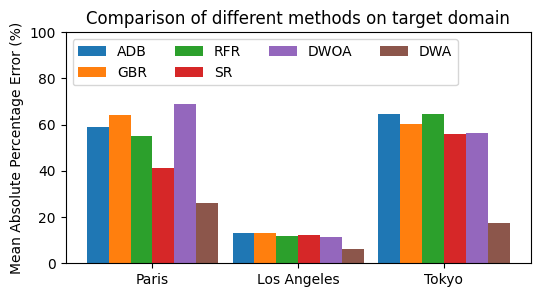

In [20]:
import matplotlib.pyplot as plt
import numpy as np

species = ("Paris", "Los Angeles","Tokyo")
penguin_means = {
    'ADB': (58.7940, 13.2627, 64.5906),    
    'GBR': (64.1127, 13.3089,  60.1003),   
    'RFR': (55.1620, 11.606, 64.7486),    
    'SR': (41.2928, 12.158, 55.7642),
    'DWOA': (69.0626, 11.3367,56.2065),
    'DWA': (25.8855, 6.3358, 17.5864),
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = -1.5

# fig, ax = plt.subplots(layout='constrained')
fig, ax = plt.subplots()
plt.rcParams['savefig.facecolor'] = "0.8"
plt.rcParams['figure.figsize'] = 6, 3.
plt.rcParams['figure.max_open_warning'] = 100

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=0)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Absolute Percentage Error (%)')
ax.set_title('Comparison of different methods on target domain')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=4)
ax.set_ylim(0, 100)
plt.savefig('test.eps', dpi=300, bbox_inches='tight')
# plt.show()

In [ ]:
Method:  Adaboost
MSE src Dhaka:  96.7630144448639
MSE tgt Dhaka:  96.7630144448639
MSE tgt Paris:  207.64458207121433
MSE tgt Los_Angeles:  259.3617824119218
MSE tgt Tokyo:  126.30593212094226
Method:  GradientBoostingRegressor
MSE src Dhaka:  102.78577788384965
MSE tgt Dhaka:  102.78577788384965
MSE tgt Paris:  97.92940207926726
MSE tgt Los_Angeles:  105.5716964888382
MSE tgt Tokyo:  74.00414143351324
Method:  RandomForestRegressor
MSE src Dhaka:  85.82521626217928
MSE tgt Dhaka:  85.82521626217928
MSE tgt Paris:  428.0064787676169
MSE tgt Los_Angeles:  466.9881873200548
MSE tgt Tokyo:  258.52703080851774
Method:  StackingRegressor
MSE src Dhaka:  112.32889830103083
MSE tgt Dhaka:  112.32889830103083
MSE tgt Paris:  1954.0485385078514
MSE tgt Los_Angeles:  761.9855680207588
MSE tgt Tokyo:  719.9933939502806
Method:  Adaboost
MSE src Paris:  7.767552861749437
MSE tgt Dhaka:  149.98616707252685
MSE tgt Paris:  7.767552861749437
MSE tgt Los_Angeles:  14.7444781215056
MSE tgt Tokyo:  87.11789674589657
Method:  GradientBoostingRegressor
MSE src Paris:  8.173960107125785
MSE tgt Dhaka:  154.40513073981356
MSE tgt Paris:  8.173960107125785
MSE tgt Los_Angeles:  13.973550830850337
MSE tgt Tokyo:  89.77438076644468
Method:  RandomForestRegressor
MSE src Paris:  5.919542255846407
MSE tgt Dhaka:  131.03907672846736
MSE tgt Paris:  5.919542255846407
MSE tgt Los_Angeles:  17.432068970611635
MSE tgt Tokyo:  76.18953076766276
Method:  StackingRegressor
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
MSE src Paris:  7.738129936549004
MSE tgt Dhaka:  137.90261601516713
MSE tgt Paris:  7.738129936549004
MSE tgt Los_Angeles:  16.951054886464274
MSE tgt Tokyo:  79.6910470978365
Method:  Adaboost
MSE src Los_Angeles:  4.023661793080969
MSE tgt Dhaka:  181.02893562214476
MSE tgt Paris:  13.359565403825838
MSE tgt Los_Angeles:  4.023661793080969
MSE tgt Tokyo:  86.66761633688206
Method:  GradientBoostingRegressor
MSE src Los_Angeles:  5.0953926868241854
MSE tgt Dhaka:  178.27911020880185
MSE tgt Paris:  12.3575269988873
MSE tgt Los_Angeles:  5.0953926868241854
MSE tgt Tokyo:  89.83232437408496
Method:  RandomForestRegressor
MSE src Los_Angeles:  3.483459142017387
MSE tgt Dhaka:  157.21003034342888
MSE tgt Paris:  11.718117276894667
MSE tgt Los_Angeles:  3.483459142017387
MSE tgt Tokyo:  73.40957673101335
Method:  StackingRegressor
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/araf/anaconda3/envs/power/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
MSE src Los_Angeles:  5.359338324573942
MSE tgt Dhaka:  114.87203526093208
MSE tgt Paris:  33.593652441037605
MSE tgt Los_Angeles:  5.359338324573942
MSE tgt Tokyo:  72.66929542402227
Method:  Adaboost
MSE src Tokyo:  49.33630502607157
MSE tgt Dhaka:  130.59576155263764
MSE tgt Paris:  28.18866868784084
MSE tgt Los_Angeles:  31.098093209385386
MSE tgt Tokyo:  49.33630502607157
Method:  GradientBoostingRegressor
MSE src Tokyo:  52.39609381931485
MSE tgt Dhaka:  129.55852089122598
MSE tgt Paris:  17.66315945241389
MSE tgt Los_Angeles:  19.05404122744288
MSE tgt Tokyo:  52.39609381931485
Method:  RandomForestRegressor
MSE src Tokyo:  40.39270874816319
MSE tgt Dhaka:  106.86054891042201
MSE tgt Paris:  30.420518063285208
MSE tgt Los_Angeles:  41.03662472384906
MSE tgt Tokyo:  40.39270874816319
Method:  StackingRegressor
MSE src Tokyo:  59.53631651425546
MSE tgt Dhaka:  485.20802891193375
MSE tgt Paris:  281.6091640541753
MSE tgt Los_Angeles:  1506.7838162494756
MSE tgt Tokyo:  59.53631651425546